# Biodiversity Observation

This project main objecxtif is to identify any relation between species and different observations made on those species.
The data being used are from two files: species_info.csv and observations.csv.

The following lines will try to find any significant relations:

- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?


## 2. Body



### 1. Data

Importing the necessary modules and loading the data: species_info.csv and observations.csv.


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

species = pd.read_csv("species_info.csv")
species.fillna = pd.read_csv("species_info.csv")
species_fillna["conservation_status"] = species.conservation_status.fillna("No Conservation Status")
observations = pd.read_csv("observations.csv")

print(species.head())
print(observations.head())


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

### 2. Analysis 

What is the distribution of conservation_status for animals?

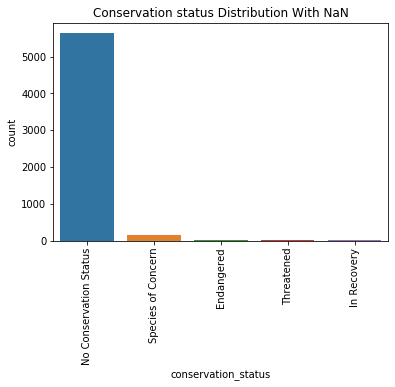

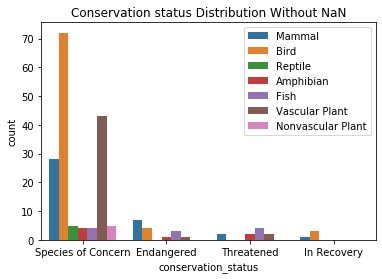

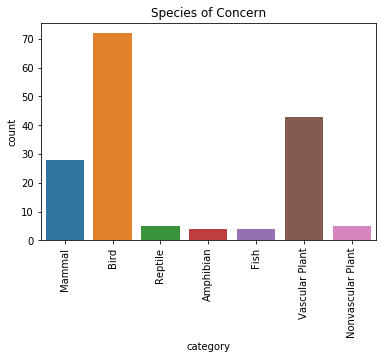

Species of Concern: 2.7644230769230766
Endangered: 0.27472527472527475
Threatened: 0.1717032967032967
In Recovery: 0.06868131868131869
Has no conservation status: 96.72046703296702


<Figure size 432x288 with 0 Axes>

In [108]:
sns.countplot(data= species_fillna, x= "conservation_status")
plt.title("Conservation status Distribution With NaN")
plt.xticks(rotation=90)
plt.show()
plt.clf()

sns.countplot(data= species, x= "conservation_status", hue = "category")
plt.title("Conservation status Distribution Without NaN")
plt.legend(loc = "upper right")
plt.show()
plt.clf()

species_concern= species[species.conservation_status == "Species of Concern"]
sns.countplot(data= species_concern, x= "category")
plt.title("Species of Concern")
plt.xticks(rotation=90)
plt.show()
plt.clf()

p_concern = len(species.conservation_status[species.conservation_status == "Species of Concern"])/len(species)*100
p_endangered =len(species.conservation_status[species.conservation_status == "Endangered"])/len(species)*100
p_threatened = len(species.conservation_status[species.conservation_status == "Threatened"])/len(species)*100
p_recovery= len(species.conservation_status[species.conservation_status == "In Recovery"])/len(species)*100
p_null = len(species_fillna.conservation_status[species_fillna.conservation_status == "No Conservation Status"])/len(species)*100
print("Species of Concern:",p_concern)
print("Endangered:",p_endangered)
print("Threatened:",p_threatened)
print("In Recovery:",p_recovery)
print("Has no conservation status:",p_null)

Has it can be observed, in the three barcharts and the conservation status percentage, nearly 97% of all species observed have no conservation status. 

Also inside the group of species with a conservation status, only the category: species of concern has a more significant count (2.76%) compare to the other categories not even close to 1% (0.27%, 0.17%, 0,07%)

The species of concern are mostly birds (70 species) then vascular plants (around 40 species) and finaly mammals (around 30 species) all the others are very low and simillar in size under 5 species .  

Are certain types of species more likely to be endangered?

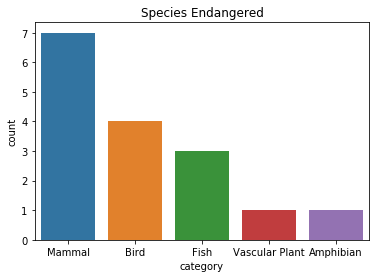

Text(0.5, 1.0, 'Mammal Endangered')

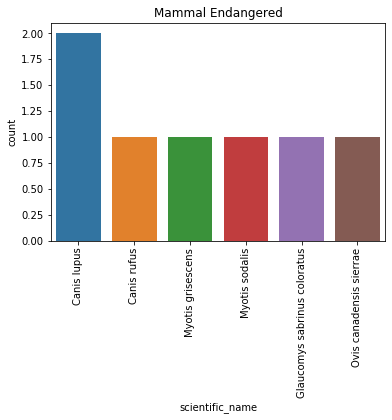

In [109]:
endangered = species[species.conservation_status == "Endangered"]
# print(endangered)

sns.countplot(data = endangered, x= "category")
plt.title("Species Endangered")
plt.show()


endangered_mammal = endangered[endangered.category == "Mammal"]
sns.countplot(data = endangered_mammal, x= "scientific_name" )
plt.xticks(rotation=90)
plt.title("Mammal Endangered")


# endangered_bird = endangered[endangered.category == "Bird"]
# sns.countplot(data = endangered_bird, x= "scientific_name" )
# plt.xticks(rotation=90)
# plt.title("Bird Endangered")


# endangered_fish = endangered[endangered.category == "Fish"]
# sns.countplot(data = endangered_fish, x= "scientific_name" )
# plt.xticks(rotation=90)
# plt.title("Fish Endangered")

The top categories found with the conservation status: Endangered are the mammal (7), the bird (4) and fish(3).

Looking closer inside the mammal in danger it seems like the wolves are the most with 3 different species. 
Otherwise all other groups in each category have only one species with the conservation status endangered.

Are the differences between species and their conservation status significant?

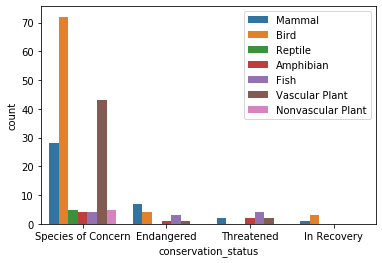

In [110]:
sns.countplot(data= species, x= "conservation_status", hue = "category")
plt.legend(loc = "upper right")


Since in the two previous questions "Species of Concen" and "Endangered" have been covered, looking at the "Theatened" species there is no significant category more threatened than another except bird that have no count.
Fianaly, regarding "In Recovery" species only the birds and the mammals are there but in a very small count.

Which species were spotted the most at each park?

In [112]:
observations_park_max = observations.groupby("park_name").observations.max().reset_index()
# print(observations_park_max)

bryce_np = observations.scientific_name[(observations.park_name =="Bryce National Park")&(observations.observations == 176)]
great_smoky_mountains_np = observations.scientific_name[(observations.park_name =="Great Smoky Mountains National Park")&(observations.observations == 147)]
yellowstone_np = observations.scientific_name[(observations.park_name =="Yellowstone National Park")&(observations.observations == 321)]
yosemite_np = observations.scientific_name[(observations.park_name =="Yosemite National Park")&(observations.observations == 223)]

species_max = ["Valerianella radiata", "Sonchus asper ssp. asper", "Lycopodium tristachyum", "Ivesia shockleyi var. shockleyi"]
observations_park_max["species (scientific name)"] = species_max
print(observations_park_max)

print(species.common_names[species.scientific_name == "Valerianella radiata"])
print(species.common_names[species.scientific_name == "Sonchus asper ssp. asper"])
print(species.common_names[species.scientific_name == "Lycopodium tristachyum"])
print(species.common_names[species.scientific_name == "Ivesia shockleyi var. shockleyi"])

                             park_name  observations  \
0                  Bryce National Park           176   
1  Great Smoky Mountains National Park           147   
2            Yellowstone National Park           321   
3               Yosemite National Park           223   

         species (scientific name)  
0             Valerianella radiata  
1         Sonchus asper ssp. asper  
2           Lycopodium tristachyum  
3  Ivesia shockleyi var. shockleyi  
1228    Beaked Corn-Salad, Corn Salad
Name: common_names, dtype: object
4840    Spiny Sowthistle
Name: common_names, dtype: object
1760    Deep-Root Clubmoss, Ground Cedar
Name: common_names, dtype: object
5728    Shockley's Ivesia, Sky Mousetail
Name: common_names, dtype: object


There was only four national parks observed: Yosemite National Park, Yellowstone National Park, Great Smoky Mountains National Park and Bryce National Park.

Here are the most spotted species at each park:

Bryce National Park : Valerianella radiata, more known as Beaked Corn-Salad, Corn Salad.

Great Smoky Mountains National Park : Sonchus asper ssp. asper, more known as Spiny Sowthistle.

Yellowstone National Park : Lycopodium tristachyum, more known as Deep-Root Clubmoss, Ground Cedar.

Yosemite National Park : Ivesia shockleyi var. shockleyi,more known as Shockley's Ivesia, Sky Mousetail.

The most observed species in each park are plants.


## 3. Conclusion(s)/Discussion

In this project 4 main questions have been covered which were :

1)What is the distribution of conservation_status for animals?
2)Are certain types of species more likely to be endangered?
3)Are the differences between species and their conservation status significant?
4)Which species were spotted the most at each park?

The first question raised the most significant observation. Nearly 97% of all the  observed species are have no conservation status, for those 3% who have one about 2.76% have the conservation status of "Species of Concern". Inside of this 2.76% birds where the most , then vascular plants and finally mammals. All the others have very little count.

Then, the second question looked at the next categorie "Endangered" after "Species of Concern". Mammals had the biggest count with seven followed by birds with four and fish with 3. Looking closer to the mammal count three out of the 7 species were wolves. It should be noted that wolves are in greater dangere than the othe species because when comparing with the other categories about 1 species where endangered.

Next, still analyzing the conservation status in the third question it appeares that no bird have the conservation status of being "Threatened" and finally the only two categories of species that were "In Recovery" where the birds and the mammals.

Finally, taking a look athe the most seen species in the four different national parks : Yosemite National Park, Yellowstone National Park, Great Smoky Mountains National Park and Bryce National Park. It was observed that plants are the most seen category and here are each most observed species by park:

Bryce National Park : Valerianella radiata, more known as Beaked Corn-Salad, Corn Salad.

Great Smoky Mountains National Park : Sonchus asper ssp. asper, more known as Spiny Sowthistle.

Yellowstone National Park : Lycopodium tristachyum, more known as Deep-Root Clubmoss, Ground Cedar.

Yosemite National Park : Ivesia shockleyi var. shockleyi,more known as Shockley's Ivesia, Sky Mousetail.

In another project it could be interesting to go deeper and see the evolution of each conservation status of the same species through time and observe if any trend or pattern can be observed and potentially explained so preventive action could be taken earlier.